### **CHSH Witness vs Measurement Parameter**

This section explores how the CHSH value changes when Bob's measurement angle is varied. The goal is to visualize how quantum correlations depend on measurement settings.

<br>

---


**1. Bob’s Variable Measurement Angles**
 - Bob uses two measurement settings defined by:
    * $$B_0 = \theta$$
    * $$B_1 = \phi$$

 - Alice keeps her settings fixed:
    - $A_0 = Z$
    - $A_1 = X$

 - By sweeping $\theta$ and $\phi$ from $0$ to $2\pi$, we evaluate how the CHSH value changes.

<br>

---



**2. CHSH Expression**

For each value of $\theta$ and $\phi$, we compute the CHSH quantity:
$$S(\theta) = E(A_0, B_0) + E(A_0, B_1) + E(A_1, B_0) - E(A_1, B_1)$$

where the correlation function is:
$$E(A_i, B_j) = P(00) + P(11) - P(01) - P(10)$$

<br>

---



**3. Classical and Quantum Predictions**

* Classical (local hidden-variable) bound:
    $$|S| \le 2$$

* Quantum mechanical (Tsirelson) bound:
    $$|S| = 2\sqrt{2} \approx 2.828$$

* When $S(\theta) > 2$, the CHSH inequality is violated, indicating quantum nonlocality.

<br>

---



**4. Goal of the Plot**

 - By plotting $S(\theta, \phi)$ over $\theta, \phi \in [0, 2\pi]$, we can:
    * See periodic oscillations of quantum correlations.
    * Identify angles where CHSH violation occurs.
    * Observe peaks near the quantum limit $2\sqrt{2}$.

 - This provides a clear visualization of how measurement settings affect Bell inequality experiments.

<br>

---

In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

backend = AerSimulator()
shots = 5000


# ----------------------------------------------------
# Compute correlation E(A,B)
# ----------------------------------------------------
def correlation(counts):
    total = sum(counts.values())
    
    p00 = counts.get('00', 0) / total
    p11 = counts.get('11', 0) / total
    p01 = counts.get('01', 0) / total
    p10 = counts.get('10', 0) / total
    
    return (p00 + p11) - (p01 + p10)


# ---------------------------------------
# CHSH circuit (Alice basis, Bob angle)
# ---------------------------------------
def chsh_circuit(A_basis, B_angle):
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)

    if A_basis == 1:
        qc.h(0)

    qc.ry(B_angle, 1)

    qc.measure([0,1], [0,1])
    return qc


# ---------------------------------------
# Compute CHSH S for given theta
#           Alice : A0 = Z; A1 = X
#           Bob  :  B0, B1
# ---------------------------------------
def compute_S(B0, B1):
    def run(A, B):
        qc = chsh_circuit(A, B)
        tqc = transpile(qc, backend)
        counts = backend.run(tqc, shots=shots).result().get_counts()
        return correlation(counts)

    E00 = run(0, B0)
    E01 = run(0, B1)
    E10 = run(1, B0)
    E11 = run(1, B1)
    return E00 + E01 + E10 - E11


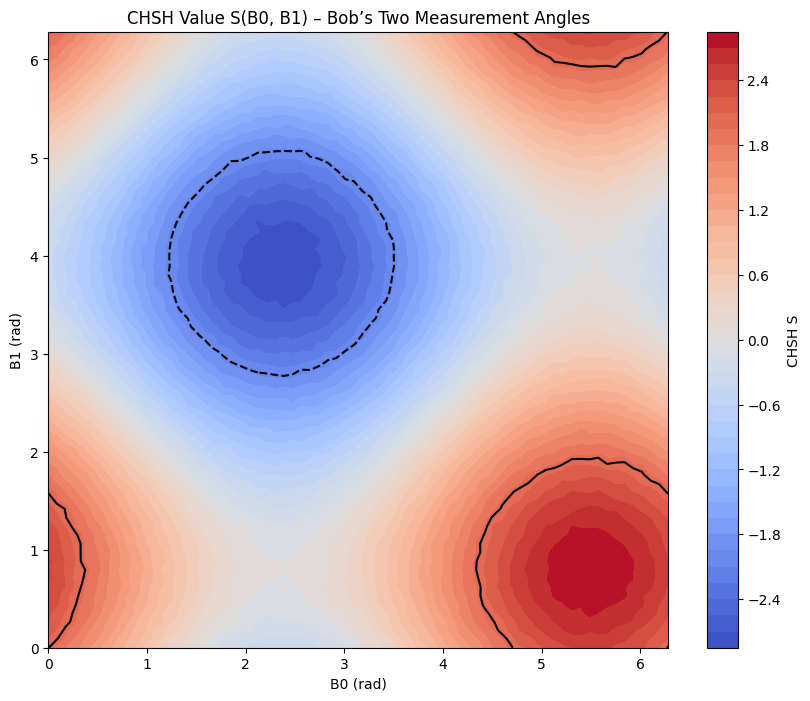

In [3]:
# ---------------------------------------
# B0 = [0, 2π], B1 = [0, 2π]
# ---------------------------------------
points = 72
B0_vals = np.linspace(0, 2*np.pi, points)
B1_vals = np.linspace(0, 2*np.pi, points)

S_map = np.zeros((points, points))

for i, B0 in enumerate(B0_vals):
    for j, B1 in enumerate(B1_vals):
        S_map[i, j] = compute_S(B0, B1)


# ---------------------------------------
# Plot 2D contour map
# ---------------------------------------
plt.figure(figsize=(10,8))
plt.contourf(B0_vals, B1_vals, S_map.T, levels=50, cmap='coolwarm')
plt.colorbar(label="CHSH S")

plt.xlabel("B0 (rad)")
plt.ylabel("B1 (rad)")
plt.title("CHSH Value S(B0, B1) – Bob’s Two Measurement Angles")

# Draw violation boundary
plt.contour(B0_vals, B1_vals, S_map.T, levels=[2], colors='black')
plt.contour(B0_vals, B1_vals, S_map.T, levels=[-2], colors='black')

plt.show()

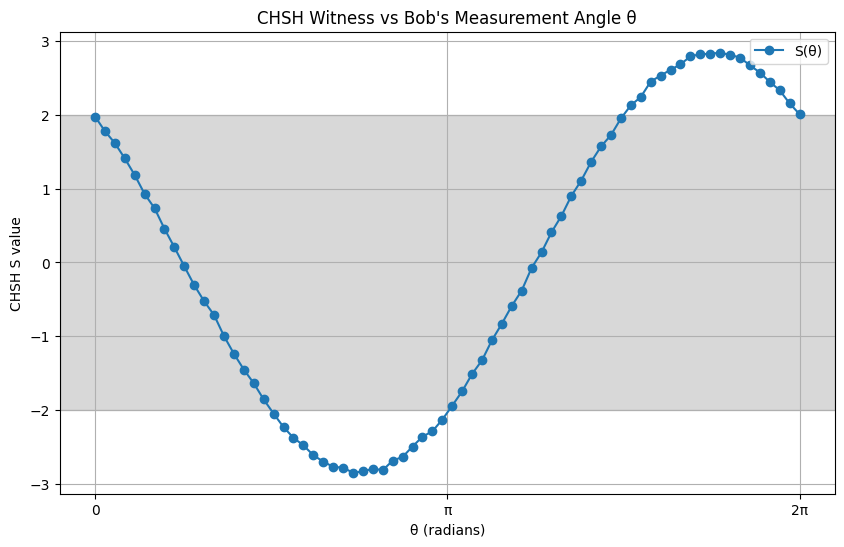

In [4]:
# ---------------------------------------
# B0 = [0, 2π], B1 = B0 + π / 2
# ---------------------------------------

points = 72
theta_vals = np.linspace(0, 2*np.pi, points)
S_list = []

for theta in theta_vals:
    B0 = theta
    B1 = theta + np.pi/2
    S_list.append(compute_S(B0, B1))

# ---------------------------------------
# Plot theta vs S(theta)
# ---------------------------------------
plt.figure(figsize=(10,6))
plt.axhspan(-2, 2, color='gray', alpha=0.3)
plt.plot(theta_vals, S_list, marker='o', label="S(θ)")

plt.xticks([0, np.pi, 2*np.pi], ["0", "π", "2π"])
plt.xlabel("θ (radians)")
plt.ylabel("CHSH S value")
plt.title("CHSH Witness vs Bob's Measurement Angle θ")
plt.grid(True)
plt.legend()
plt.show()


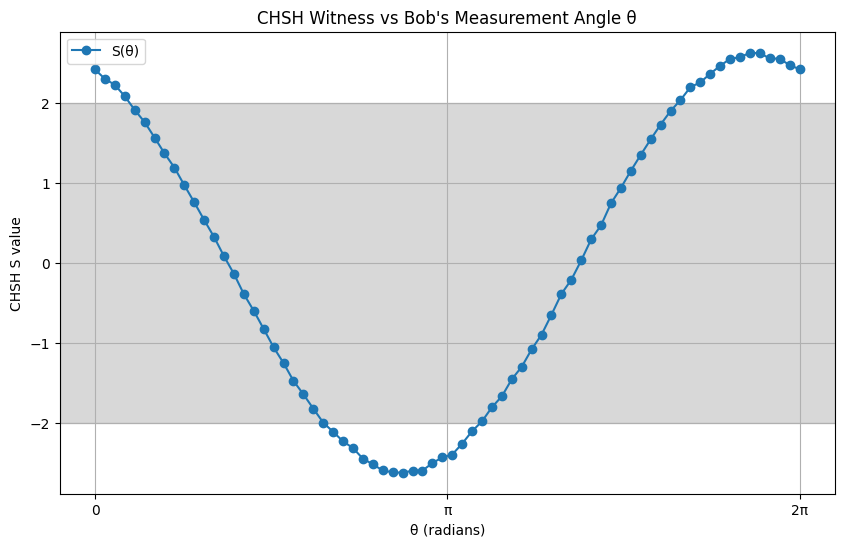

In [5]:
# ---------------------------------------
# B0 = [0, 2π], B1 = B0 + π / 4
# ---------------------------------------

points = 72
theta_vals = np.linspace(0, 2*np.pi, points)
S_list = []

for theta in theta_vals:
    B0 = theta
    B1 = theta + np.pi/4
    S_list.append(compute_S(B0, B1))

# ---------------------------------------
# Plot theta vs S(theta)
# ---------------------------------------
plt.figure(figsize=(10,6))
plt.axhspan(-2, 2, color='gray', alpha=0.3)
plt.plot(theta_vals, S_list, marker='o', label="S(θ)")

plt.xticks([0, np.pi, 2*np.pi], ["0", "π", "2π"])
plt.xlabel("θ (radians)")
plt.ylabel("CHSH S value")
plt.title("CHSH Witness vs Bob's Measurement Angle θ")
plt.grid(True)
plt.legend()
plt.show()
